#DAY 24


Feature Ennginering

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("c:\\Users\\91893\\Desktop\\Pandas\\CSV_FILE\\Healthcare-Diabetes.csv")

StandradScaler

In [30]:
from sklearn.model_selection import train_test_split
X_train , x_test , Y_train , y_test = train_test_split(df.drop('Outcome' , axis=1),df['Outcome'],test_size=0.8,random_state=0)

In [31]:
X_train.shape,x_test.shape

((553, 2), (2215, 2))

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
scaler.mean_

array([  3.82820976, 121.32007233])

In [35]:
df.head(5)

,Pregnancies,Glucose,Outcome
0,6,148,1
1,1,85,0
2,8,183,1
3,1,89,0
4,0,137,1


In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [37]:
X_train_scaled

,Pregnancies,Glucose
0,-0.541878,-0.641861
1,-1.134675,1.885142
2,1.236512,-1.494725
3,-1.134675,0.400528
4,-0.245480,0.053065
...,...,...
548,1.829308,-0.641861
549,-0.541878,-0.389161
550,-0.245480,1.632442
551,-0.838277,-0.010110


Effect of Scalling


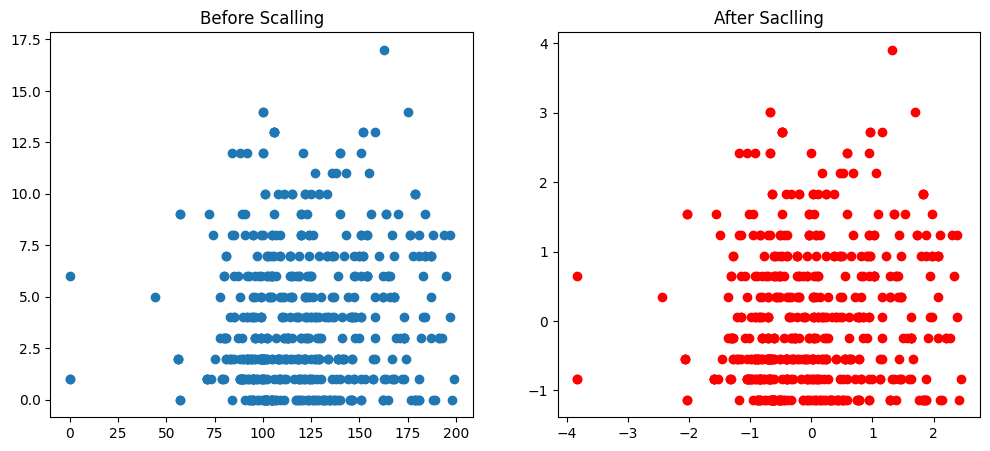

In [49]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize=(12,5))

ax1.scatter(X_train['Glucose'] , X_train['Pregnancies'])
ax1.set_title("Before Scalling")
ax2.scatter(X_train_scaled['Glucose'] , X_train_scaled['Pregnancies'],color = 'red')
ax2.set_title("After Saclling")
plt.show()

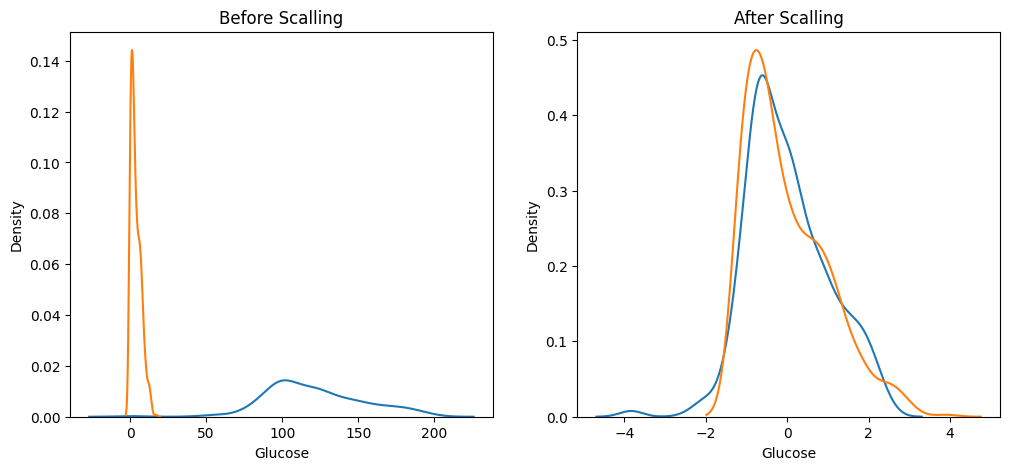

In [53]:
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize = (12,5))

#Before scalling
ax1.set_title("Before Scalling")
sns.kdeplot(X_train['Glucose'] , ax = ax1)
sns.kdeplot(X_train['Pregnancies'] , ax = ax1)

#After Scalling
ax2.set_title("After Scalling")
sns.kdeplot(X_train_scaled['Glucose'],ax = ax2)
sns.kdeplot(X_train_scaled['Pregnancies'],ax = ax2)

plt.show()

Comparsion of Distribution

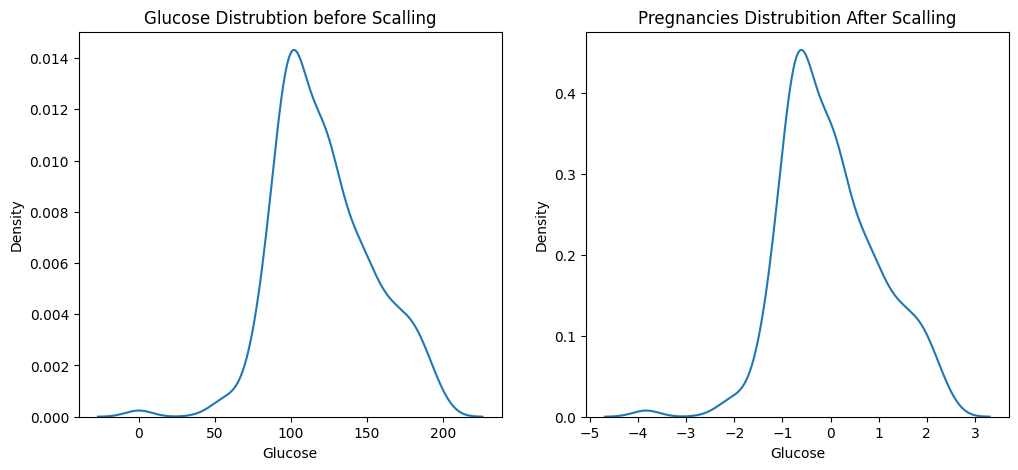

In [57]:
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize = (12,5))

ax1.set_title("Glucose Distrubtion before Scalling")
sns.kdeplot(X_train['Glucose'],ax=ax1)

ax2.set_title("Pregnancies Distrubition After Scalling")
sns.kdeplot(X_train_scaled['Glucose'],ax=ax2)
plt.show()

Why scalling is important

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [68]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [61]:
y_pred = lr.predict(X_train)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

c:\Users\91893\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [71]:
# print("Actual",accuracy_score(y_test,y_pred))
# print("Scaled",accuracy_score(y_test,y_pred_scaled))

ValueError: Found input variables with inconsistent numbers of samples: [2215, 553]